In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing and Examining the Data

First let's download import the dataset with pandas from the .csv file

In [99]:
df = pd.read_csv("data/raw/cirrhosis/cirrhosis.csv", index_col="ID")

Now let's take a quick look at what we're working with

In [100]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [101]:
df.shape

(418, 19)

It looks like our dataset is fairly small, 418 rows with 19 features, one of them, the Stage column being the y value for our dataset. The provided info for each feature is the following:
1) ID: unique identifier
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986
3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4) Drug: type of drug D-penicillamine or placebo
5) Age: age in [days]
6) Sex: M (male) or F (female)
7) Ascites: presence of ascites N (No) or Y (Yes)
8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9) Spiders: presence of spiders N (No) or Y (Yes)
10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11) Bilirubin: serum bilirubin in [mg/dl]
12) Cholesterol: serum cholesterol in [mg/dl]
13) Albumin: albumin in [gm/dl]
14) Copper: urine copper in [ug/day]
15) Alk_Phos: alkaline phosphatase in [U/liter]
16) SGOT: SGOT in [U/ml]
17) Triglycerides: triglicerides in [mg/dl]
18) Platelets: platelets per cubic [ml/1000]
19) Prothrombin: prothrombin time in seconds [s]
20) Stage: histologic stage of disease (1, 2, 3, or 4)

In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,418.0,1917.782297,1104.672992,41.00,1092.7500,1730.00,2613.50,4795.00
Age,418.0,18533.351675,3815.845055,9598.00,15644.5000,18628.00,21272.50,28650.00
Bilirubin,418.0,3.220813,4.407506,0.30,0.8000,1.40,3.40,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.5000,309.50,400.00,1775.00
Albumin,418.0,3.497440,0.424972,1.96,3.2425,3.53,3.77,4.64
Copper,310.0,97.648387,85.613920,4.00,41.2500,73.00,123.00,588.00
Alk_Phos,312.0,1982.655769,2140.388824,289.00,871.5000,1259.00,1980.00,13862.40
SGOT,312.0,122.556346,56.699525,26.35,80.6000,114.70,151.90,457.25
Tryglicerides,282.0,124.702128,65.148639,33.00,84.2500,108.00,151.00,598.00
Platelets,407.0,257.024570,98.325585,62.00,188.5000,251.00,318.00,721.00


For our numerical features, we can see we have quite a few missing values in the columns: Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin and Stage. Given the size of our dataset this is far from ideal but we have to work with it. In particular it seems like 6 instances where Stage is missing have to be dropped since they won't be able to be used at all, either for training or for testing. Luckily it is only 6 rows that have to be dropped entirely. 

In [103]:
df.describe(exclude="number").T

,count,unique,top,freq
Status,418,3,C,232
Drug,312,2,D-penicillamine,158
Sex,418,2,F,374
Ascites,312,2,N,288
Hepatomegaly,312,2,Y,160
Spiders,312,2,N,222
Edema,418,3,N,354


For our categorical values we also seem to be missing about 1/4 of the entries for the categories of Ascites, Hepatomegaly, Spiders and Drugs. Luckily for each of these we seem to only have 2 categories. 


Now let's see the distribution of our data:

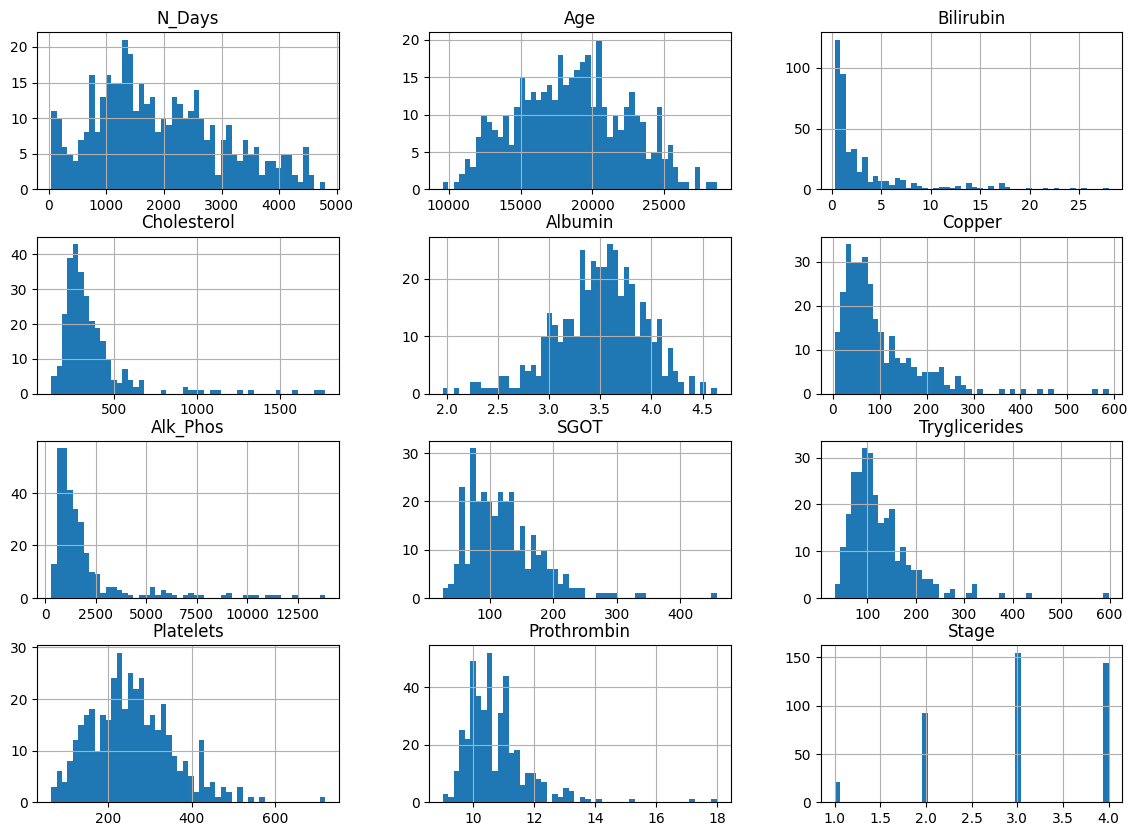

In [104]:
df.hist(bins=50, figsize=(14, 10))
plt.show()

The data seems to be distributed either somewhat gaussian or tail heavy distributions, this will be important when it comes to scaling our features. The only standout among these is Stage which is discritely distributed, this is because this feature is categorical. 

Now it would be useful to see how each feature is correlated to each other. Before doing this however, we'll make a small transformer to encode our categorical values as numerical so we can also see how all of our features correlate to one another. 

In [105]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder

In [106]:
print(df["Status"].unique())
print(df["Edema"].unique())

['D' 'C' 'CL']
['Y' 'N' 'S']


We can actually use ordinal encoding for all our categorical features, most of these are binary. The only exceptions are Status and Edema which have the above listed values. Let's take a look at what they mean:
- 3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death).
- 10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy).

Both of these make sense when encoded numerically and in rising values, as each one is rising in severity. We will also use ordinal encoding for these.

In [107]:
correlation_copy = df.copy(deep=True)

ordinal_pipeline = make_pipeline(OrdinalEncoder(handle_unknown='error'))

 
correlation_encoder = make_column_transformer(
    (ordinal_pipeline, make_column_selector(dtype_exclude=np.number)),
    remainder="passthrough"
)

transformed_corr = correlation_encoder.fit_transform(correlation_copy)
transformed_corr_df = pd.DataFrame(transformed_corr, 
                                    columns=correlation_encoder.get_feature_names_out(),
                                    index=df.index)

In [108]:
transformed_corr_df.head()

,pipeline__Status,pipeline__Drug,pipeline__Sex,pipeline__Ascites,pipeline__Hepatomegaly,pipeline__Spiders,pipeline__Edema,remainder__N_Days,remainder__Age,remainder__Bilirubin,remainder__Cholesterol,remainder__Albumin,remainder__Copper,remainder__Alk_Phos,remainder__SGOT,remainder__Tryglicerides,remainder__Platelets,remainder__Prothrombin,remainder__Stage
ID,,,,,,,,,,,,,,,,,,,
1,2.0,0.0,0.0,1.0,1.0,1.0,2.0,400.0,21464.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,4500.0,20617.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1012.0,25594.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1925.0,19994.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1504.0,13918.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


Now we have all our features as numerical, although they aren't scaled yet. Before we visualize we will actually drop our Stage column, since we don't want to bias ourselves by looking at how each of the features correlates to the our y value before we even begin training our models.

In [109]:
transformed_corr_df = transformed_corr_df.drop('remainder__Stage', axis=1)
transformed_corr_df.columns

Index(['pipeline__Status', 'pipeline__Drug', 'pipeline__Sex',
       'pipeline__Ascites', 'pipeline__Hepatomegaly', 'pipeline__Spiders',
       'pipeline__Edema', 'remainder__N_Days', 'remainder__Age',
       'remainder__Bilirubin', 'remainder__Cholesterol', 'remainder__Albumin',
       'remainder__Copper', 'remainder__Alk_Phos', 'remainder__SGOT',
       'remainder__Tryglicerides', 'remainder__Platelets',
       'remainder__Prothrombin'],
      dtype='object')

Now we can take a quick look at our correlation matrix:

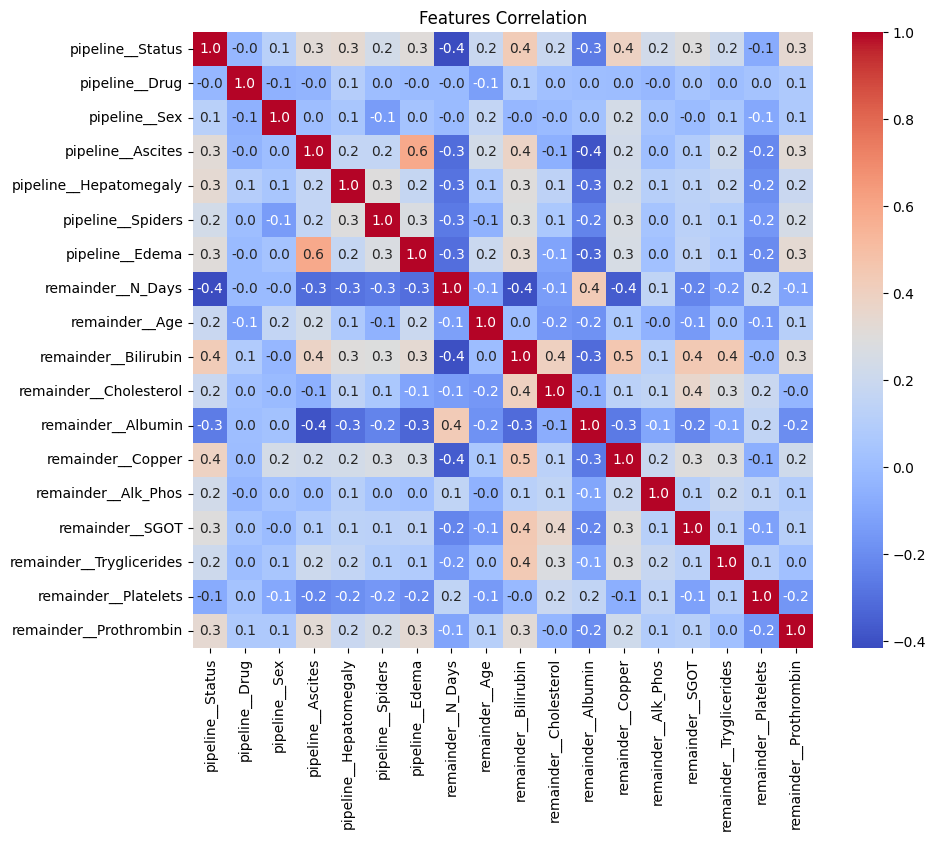

In [173]:
import seaborn as sns 

corr_mat = transformed_corr_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Features Correlation")
plt.show()

Here we have a lot of interesting findings:
- Edemas and ascites are highly related
- Copper, SGOT, Tryglicerides, Prothrombin and Cholesterol seem to be correlated to Bilirubin, Albumin is negatively related. 
- Age, sex, Alk_Phos and Platelets seem to be not be very strongly related to the other features.
- Interestingly neither does drug (drug indicates whether the patient actually took the drug or was given a placebo, the drug might not have been very effective).
- Number of days seems to be mostly negatively related to most other things, except for Albumin.

It can be quite difficult to engineer features when one is unfamiliar with the object of study, bear in mind that we want to avoid creating colinear features, so we will err on the safe side of things. My proposed features are
- Ascites * Edema 
- Albumin * Platelets, notice that these are the only features with a negative correlation to Status. I imagine status might be quite important to predicting the stage.


Before we prepare the data for training let's take another look at the histogram for our dataset now that all our features are numerical:

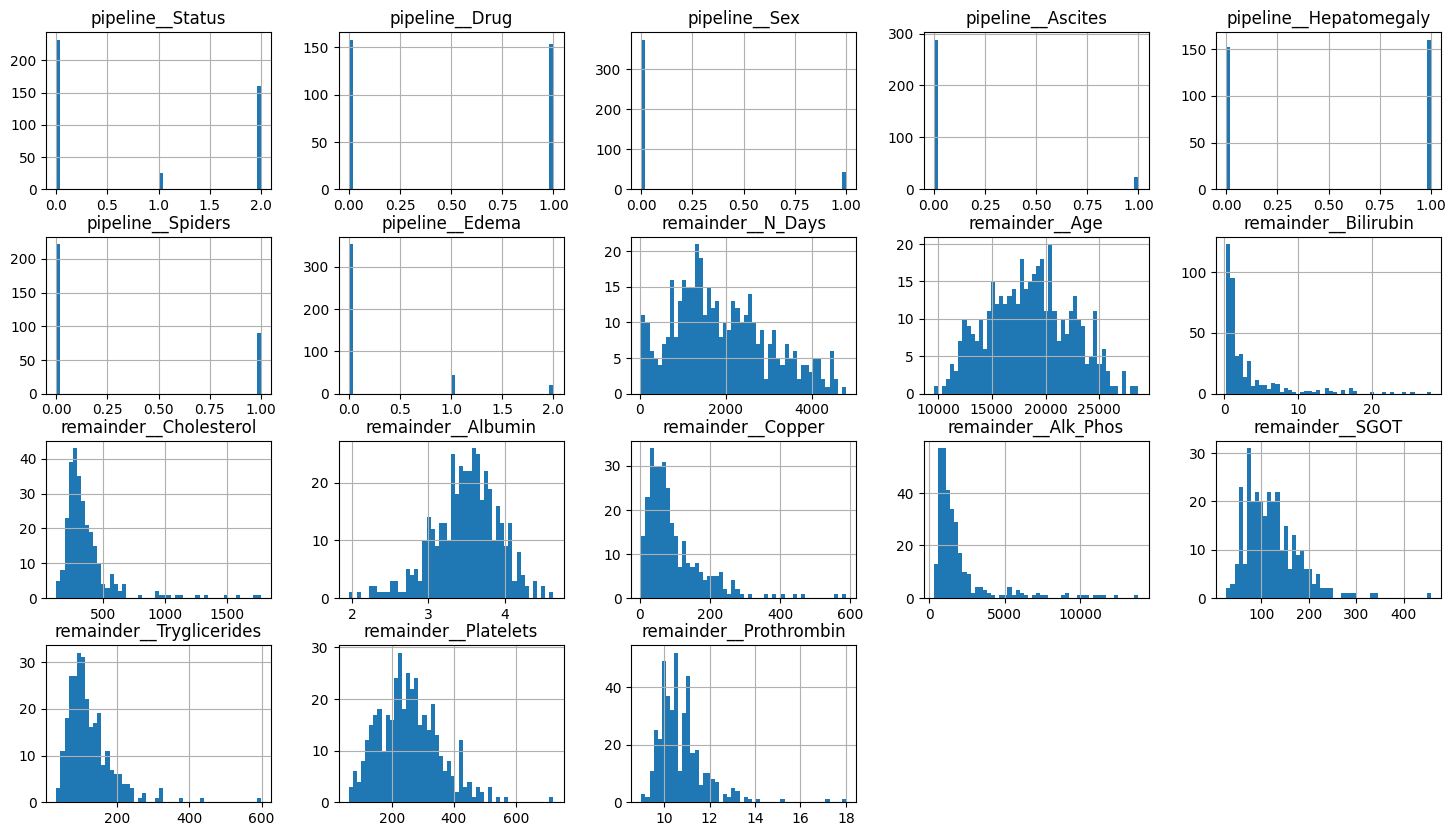

In [178]:
transformed_corr_df.hist(bins=50, figsize=(18, 10), layout=(4,5))
plt.show()

Unfortunately it seems as though some of our new features are quite unbalanced in their distribution, there's not really much we can do about it. 
Before making our preprocessing pipelines we will make our train test split. Since our dataset is quite small we have to make sure to stratify it. Again, it can be quite difficult to pick the right feature when one is unfamiliar with the matter of study, however it would seem to me as though Status is an important feature for the Stage (whether the patient died seems to me like it would matter for predicting the stage).

# Train Test Split

First we will drop the 6 rows where our y value is unknown.

In [112]:
df_copy = df.copy(deep=True)
df_copy = df_copy[df["Stage"].notnull()]

In [113]:
y = df_copy["Stage"].copy()
X = df_copy.copy()
X.drop("Stage", axis=1, inplace=True)

In [114]:
print(X.shape)
print(y.shape)

(412, 18)
(412,)


In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X["Status"], random_state=21)

# Preparing the data

Now that we have our train and test sets we can go ahead and start making our pipelines.
In short we want to:
- fill out missing values, for numerical columns this will be done with the mean or median, for the categorical it will be done with the mode.
- Scale our numerical rows, for the tail heavy distributions we will first take the logarithm of each instance.
- We want to encode our categorical features as we did previously.
- We will create our two new features.

In [116]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer, StandardScaler

In [117]:
X_train.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')

We will preprocess our features according to whether they are categorical or numerical, for the numerical ones we'll also take care to logarithmically scale our long tailed distributions so they're more uniformly spread when scaled down.
The categorical features can be included according to their type, thus we will not explicitly list them.

In [118]:
log_features = ["Bilirubin", "Cholesterol", "Albumin", "Copper", "Alk_Phos", "SGOT", "Tryglicerides", "Platelets", "Prothrombin"]
normal_features = ["N_Days", "Age"]

We have to define our own function to create our new features

In [119]:
def column_and(X):
    return X[:, [0]] * X[:, [1]] 

def and_name(function_transformer, feature_names_in):
    return ["and"] # feature names out

def and_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OrdinalEncoder(),
        FunctionTransformer(column_and, feature_names_out=and_name)
    )

In [120]:
def column_times(X):
    return X[:, [0]] * X[:, [1]]

def times_name(function_transformer, feature_names_in):
    return ["times"]

def times_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.log, feature_names_out="one-to-one"),
        FunctionTransformer(column_times, feature_names_out=times_name),
        StandardScaler()
    )

In [121]:
log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler()
)

normal_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

categorical_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OrdinalEncoder()
)

In [135]:
preprocessing = make_column_transformer(
    (log_pipeline, log_features),
    (normal_pipeline, normal_features),
    (categorical_pipeline, make_column_selector(dtype_include=object)),
    (and_pipeline(), ["Ascites", "Edema"]),
    (times_pipeline(), ["Albumin", "Platelets"]),
    remainder="passthrough"
)

In [136]:
X_prepared = preprocessing.fit_transform(X_train)
X_prepared_df = pd.DataFrame(
    X_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=X_train.index
)
X_prepared.shape

(329, 20)

In [137]:
X_prepared_df.head(2)

,pipeline-1__Bilirubin,pipeline-1__Cholesterol,pipeline-1__Albumin,pipeline-1__Copper,pipeline-1__Alk_Phos,pipeline-1__SGOT,pipeline-1__Tryglicerides,pipeline-1__Platelets,pipeline-1__Prothrombin,pipeline-2__N_Days,pipeline-2__Age,pipeline-3__Status,pipeline-3__Drug,pipeline-3__Sex,pipeline-3__Ascites,pipeline-3__Hepatomegaly,pipeline-3__Spiders,pipeline-3__Edema,pipeline-4__and,pipeline-5__times
ID,,,,,,,,,,,,,,,,,,,,
169,-0.272324,0.716552,1.500114,-0.024156,0.029332,0.617814,0.607923,0.50112,-0.636782,-0.647175,-1.475442,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.442847
261,0.634151,0.476298,-0.808133,0.908665,-0.740408,-0.577796,-0.072110,1.11065,-1.319773,-0.226659,0.177696,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,-0.084390


# Preliminary Model Exploration

We're done with preprocessing! Now we can start training various models and see how they perform out of the box. We'll try out the following classifiers:
- Decision Tree
- Logistic Regression
- Linear SVC
- Poly SVM 
- RBF SVM

In [138]:
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [139]:
pre_naive_clf = GaussianNB()
pre_lin_sdg_clf = SGDClassifier(random_state=21)
pre_lin_svm_clf = LinearSVC(random_state=21)
pre_forest_clf = RandomForestClassifier(n_estimators=100, max_depth=3)
pre_rbf_clf = SVC(kernel="rbf", random_state=21, probability=True)
pre_poly_clf = SVC(kernel="poly", max_iter=1000, degree=3, random_state=21, probability=True)
pre_logit_clf = LogisticRegressionCV(max_iter=1000, random_state=21, l1_ratios=(0,), use_legacy_attributes=False)
pre_mlp_clf = MLPClassifier(max_iter=2000, random_state=21)
pre_tree_clf = DecisionTreeClassifier(random_state=21)
pre_estimators = {
                    "Gaussian Classifier": pre_naive_clf,
                    "SDG Classifier": pre_lin_sdg_clf,
                    "Linear SVM Classifier": pre_lin_svm_clf,
                    "Random Forest Classifier": pre_forest_clf,
                    "SVC with RBF Kernel": pre_rbf_clf,
                    "SVC with Poly Kernel": pre_poly_clf,
                    "Logistic Regression Classifier": pre_logit_clf,
                    "Multilayer Perceptron Classifier": pre_mlp_clf,
                    "Decision Tree Classifier": pre_tree_clf
                 }

In [146]:
print("Estimators' cross evaluation with 3 folds")
first_scores = {}
for estimator_name, estimator in pre_estimators.items():
    estimator.fit(X_prepared_df, y_train)
    est_eval = (cross_val_score(estimator, X_prepared_df, y_train, cv=3)).mean()
    print(f"{estimator_name}: {est_eval:.5f}")
    first_scores[estimator_name] = est_eval

Estimators' cross evaluation with 3 folds
Gaussian Classifier: 0.24918
SDG Classifier: 0.42271
Linear SVM Classifier: 0.49252
Random Forest Classifier: 0.51985
SVC with RBF Kernel: 0.52891
SVC with Poly Kernel: 0.46500
Logistic Regression Classifier: 0.50767
Multilayer Perceptron Classifier: 0.51056
Decision Tree Classifier: 0.39210


None of them are looking very good honestly, our best models are barely getting a score above 50%. Let's take a look at the importance of each feature according to our decision tree

# Feature weights

In [141]:
d = {"Feature Name": X_prepared_df, "Importance": pre_forest_clf.feature_importances_}
importance_table = pd.DataFrame(index=X_prepared_df.columns, data=pre_forest_clf.feature_importances_, columns=["Weight"])
importance_table.sort_values(by="Weight", ascending=False, inplace=True)
importance_table

,Weight
pipeline-5__times,0.166529
pipeline-1__Prothrombin,0.136077
pipeline-2__N_Days,0.124211
pipeline-1__Albumin,0.098842
pipeline-3__Hepatomegaly,0.071877
pipeline-1__Bilirubin,0.070310
pipeline-1__Platelets,0.061112
pipeline-2__Age,0.048053
pipeline-1__Tryglicerides,0.041906
pipeline-1__Cholesterol,0.039749


It looks like one our engineered features is our best performing features for this dataset! The other is actually one of our worst performing but that's ok as well.
It seems like not all of our features are all that important for the model we have 20 features in total yet only 13 account for 95% of the weight for our predictions.
Whenever we do dimensionality reduction preprocessing 95% is usually our desired amount of variance too keep. We will not actually be doing dimensionality reduction since our dataset is not very high dimensional, remember it's only 20 features, and for this kind of task the readability of our interpretations is worth quite a lot. We will simply drop our worst performing 7 predictors.

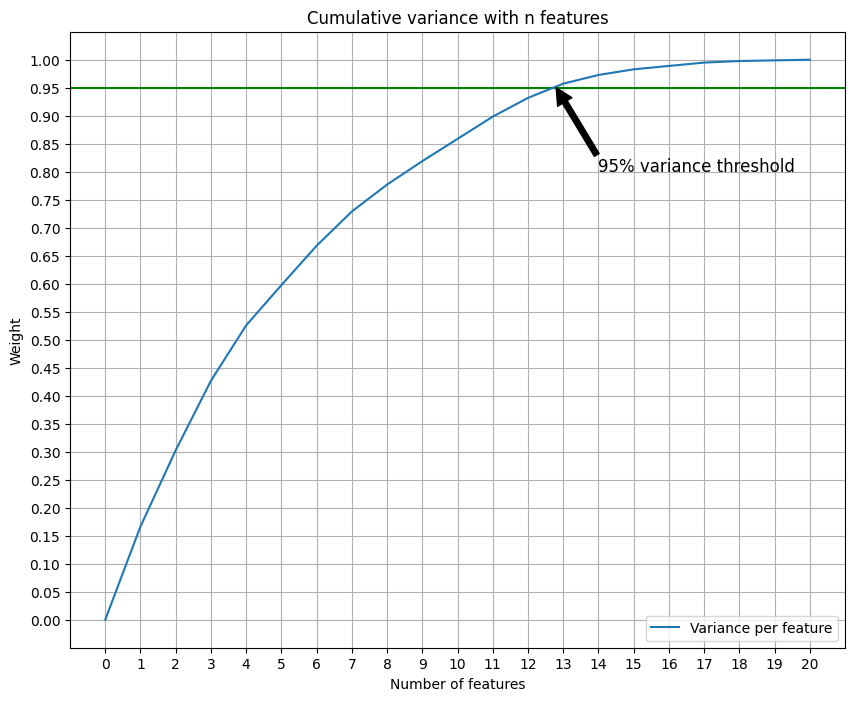

In [142]:
y_vals = list(range(len(importance_table)+1))
importance_variance = np.add.accumulate(importance_table)
importance_variance = np.append([0], importance_variance) # We need to shift our data 1 place to the right

plt.figure(figsize=(10, 8))
plt.title("Cumulative variance with n features")
plt.axhline(y=0.95, color="g", linestyle="-")
plt.plot(y_vals, importance_variance, label="Variance per feature")
plt.legend(loc="lower right")
plt.xticks(np.arange(len(importance_table)+1))
plt.yticks(np.arange(0, 1.01, .05))
plt.grid(True)
plt.xlabel("Number of features")
plt.ylabel("Weight")
plt.annotate(text="95% variance threshold", xy=(12.8, 0.95), xytext=(14, .8), 
             color="black", fontsize=12, arrowprops={"facecolor": "black"}, 
             wrap=True, ha="left")
plt.show()

# Dropping Lightweight Features

First we'll drop our aforementioned last 6 features an look at how our best performing model does now. Then we can go back to the drawing board and see if we can't engineer some new features with our new insights.

In [143]:
columns_to_cut = importance_table[-7:].index
for column in columns_to_cut:
    print(column)

pipeline-1__SGOT
pipeline-3__Spiders
pipeline-3__Edema
pipeline-3__Ascites
pipeline-3__Sex
pipeline-4__and
pipeline-3__Drug


In [144]:
X_prepared_cut_df = X_prepared_df.drop(columns_to_cut, axis="columns")
X_prepared_cut_df.shape

(329, 13)

Let's see if this actually helped:

In [147]:
print("Estimators' cross evaluation with 3 folds after dropping 7 features")
second_scores = {}
for estimator_name, estimator in pre_estimators.items():
    estimator.fit(X_prepared_cut_df, y_train)
    est_eval = (cross_val_score(estimator, X_prepared_cut_df, y_train, cv=3)).mean()
    print(f"{estimator_name}: {est_eval:.5f}")
    second_scores[estimator_name] = est_eval

Estimators' cross evaluation with 3 folds after dropping 7 features
Gaussian Classifier: 0.35263
SDG Classifier: 0.44070
Linear SVM Classifier: 0.53508
Random Forest Classifier: 0.51373
SVC with RBF Kernel: 0.55621
SVC with Poly Kernel: 0.46191
Logistic Regression Classifier: 0.51371
Multilayer Perceptron Classifier: 0.45585
Decision Tree Classifier: 0.44684


# Evaluating the Difference

In [165]:
scores = [first_scores, second_scores]
scores_difference = pd.concat(map(pd.Series, scores), axis=1)
scores_difference.columns = ["Before Dropping", "After Dropping"]
scores_difference["Difference"] = scores_difference["After Dropping"] - scores_difference["Before Dropping"] 
scores_difference.loc["Difference"] = pd.Series(scores_difference["Difference"].sum(), index=["Difference"])
scores_difference

,Before Dropping,After Dropping,Difference
Gaussian Classifier,0.249180,0.352627,0.103447
SDG Classifier,0.422713,0.440701,0.017987
Linear SVM Classifier,0.492522,0.535085,0.042563
Random Forest Classifier,0.519850,0.513734,-0.006116
SVC with RBF Kernel,0.528913,0.556214,0.027301
SVC with Poly Kernel,0.464999,0.461913,-0.003086
Logistic Regression Classifier,0.507673,0.513706,0.006033
Multilayer Perceptron Classifier,0.510564,0.455852,-0.054712
Decision Tree Classifier,0.392105,0.446845,0.054740
Difference,NaN,NaN,0.188157


Overall there was a small improvement in our scores so we'll keep this new dataset. Now let's take another look at our correlation matrix and the predictors' weight.

In [168]:
d = {"Feature Name": X_prepared_cut_df, "Importance": pre_forest_clf.feature_importances_}
importance_table = pd.DataFrame(index=X_prepared_cut_df.columns, data=pre_forest_clf.feature_importances_, columns=["Weight"])
importance_table.sort_values(by="Weight", ascending=False, inplace=True)
importance_table

,Weight
pipeline-5__times,0.203867
pipeline-1__Prothrombin,0.137129
pipeline-2__N_Days,0.120008
pipeline-1__Albumin,0.091547
pipeline-1__Platelets,0.083388
pipeline-2__Age,0.078363
pipeline-3__Hepatomegaly,0.063293
pipeline-1__Bilirubin,0.056086
pipeline-1__Tryglicerides,0.035621
pipeline-3__Status,0.034055


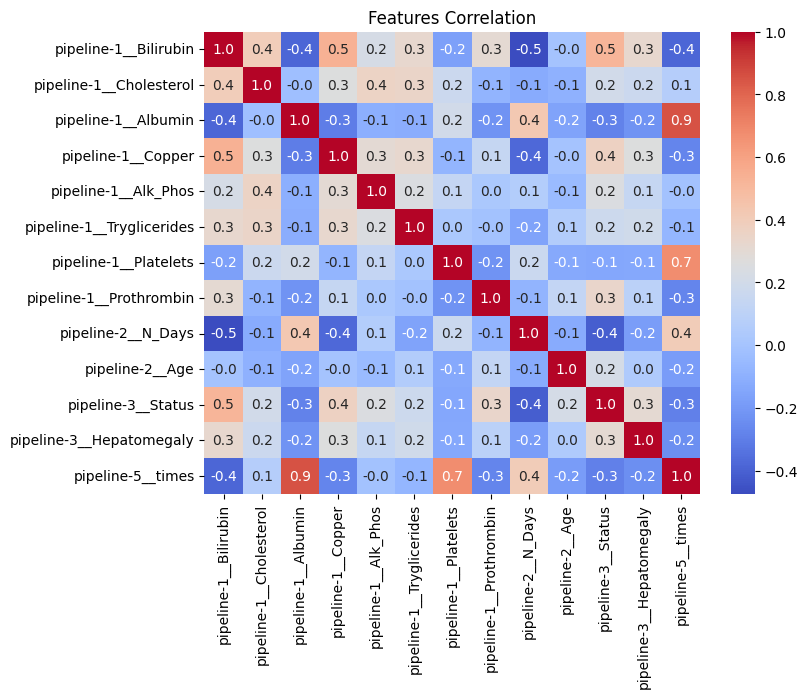

In [172]:
import seaborn as sns 

corr_mat = X_prepared_cut_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Features Correlation")
plt.show()

Here we can notice something pretty interesting, notice the *pipeline-3_Status* column, or row if you prefer, it is positively correlated with the columns Bilirubin, Cholesterol, Copper, Alk_Phos, Tryglicerides, Prothrombin, Age and Hepatomegaly. This makes them negative indicators for the status of the patient. Remember that if the patient status is 0 they hadn't died at the time of the study, if it is 1 they got a transplant (how this affects the data can be difficult to measure), and if it is 3 they died. Moreover, Bilirubin, Cholesterol, Copper, Alk_Phos, Tryglicerides, Prothrombin and Hepatomegaly are somewhat colinear, as you can see in the matrix. <br>
Can we just multiply all of these and drop all of these attributes? I believe it could be worth exploring, perhaps some of our models are being held back by this colinearity. 

# New preprocessing pipeline